Design a Deep Q Learning Network (DQN) using Keras and OpenAI Gym, for cartole game and visualize your results.

Import the required libraries/packages

In [20]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [22]:
from collections import deque

In [23]:
import math
import random

In [24]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Setting up the environment

For the starting state all the observations are assigned a uniform random value between +- 0.05

In [25]:
env = gym.make("CartPole-v0")

The action contains to discrete values. 0 and 1. 0 is to push the cart to the left and 1 is to push the cart to the right 

In [26]:
action_space = env.action_space.n
print(action_space)

2


The observation consists of 4 values. Cart postion, Cart velocity, Pole Angle, and Pole Velocity At Tip. 

In [27]:
observation_space= env.observation_space.shape[0]
print(observation_space)

4


In [9]:
'''env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50):
  action_space = env.action_space.sample()
  observation_space, reward, done, info = env.step(action_space)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()'''

"env.reset()\nprev_screen = env.render(mode='rgb_array')\nplt.imshow(prev_screen)\n\nfor i in range(50):\n  action_space = env.action_space.sample()\n  observation_space, reward, done, info = env.step(action_space)\n  screen = env.render(mode='rgb_array')\n\n  plt.imshow(screen)\n  ipythondisplay.clear_output(wait=True)\n  ipythondisplay.display(plt.gcf())\n\n  if done:\n    break\n\nipythondisplay.clear_output(wait=True)\nenv.close()"

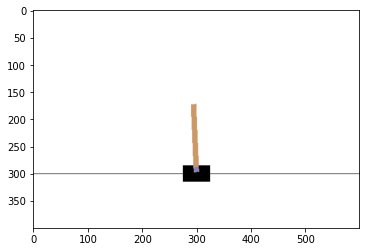

In [38]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(5):
  observation = env.reset()
  for j in range(10):
    env.render()
    action_space = env.action_space.sample()
    observation_space, reward, done, info = env.step(action_space)
    if done:
      print("Episode finished after {} timesteps".format(j+1))
      break

  
    screen = env.render(mode='rgb_array')

    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    plt.imshow(prev_screen)
plt.imshow(prev_screen)
ipythondisplay.clear_output(wait=True)
env.close()

Setting up the parameters

In [29]:
episodes = 50
batch_size = 10
max_env_steps = None

gamma = 0.95 #discount factor. Consideration of future rewards
learning_rate = 0.01 #most recent result 
memory_size = deque(maxlen=100000)

explorationMax = 1.0 #choses uniformaly random choice (which way to go)
explorationMin = 0.01
explorationDecay = 0.995 #how fast the expoloration will stop

if max_env_steps is not None:
  env.max_episode_steps = max_env_steps

Building the sequential model 

In [30]:
#tree dense layers
model = Sequential()
model = Sequential()
model.add(Dense(128, input_shape=(env.observation_space.shape[0],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))
model.compile(loss='mse', optimizer=Adam(lr=learning_rate,decay=explorationDecay), metrics=['mae'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 130       
Total params: 9,026
Trainable params: 9,026
Non-trainable params: 0
_________________________________________________________________
None


Defining functions

Remeber function will set up the momory

In [31]:
def remember(state, action_space, reward, next_state, done):
  memory.append((state,action_space,reward, next_state, done))

This functon is used to determine what will happen based on the exploration rate (max). It will change depending on the value of exploration max.



In [32]:
def pick_action(state, explorationMax):
  if (np.random.random) <= explorationMax:
    return env.action_space.sample()

  #else predict based on the current staage of the model if it is in the current stage
  else:
    np.argmax(model.predict(state))
                                       

In [33]:
def get_exploration(t):
  return max(explorationMin, min(explorationMax, 1.0 - math.log10((t+1)*explorationDecay)))

preprocess to make sure it is in the right format

In [35]:
def pre_State(state):#prepocess state
  return np.reshape(state,[1,4])

replay function 

In [17]:
def replay_fun(batch_size, explorationMax):
  batch_x = []
  batch_y = []
  smallBatch = random.sample(memory_size, min(len(memory_size),batch_size))

  for state, action_space, reward, next_state, done in smallBatch:
    target_y = model.predict(state) #what the model will predict
    if done:
      reward
    else:
      reward + gamma + np.max(model.predict(next_state)[0])

    batch_x.append(state[0])
    batch_y.append(state[0])
    model.fit(np.array(batch_x),batch_size=len(batch_x),verbose=0)

    #update the exploration each time
    if explorationMax > explorationMin:
      explorationMax *= explorationDecay #decreases each time the replay fun is called

In [36]:
#this will record the environemnt state and will pick the best action
def run():
  scores = deque(maxlen=100)

  for num_episodes in range(episodes):
    state = pre_State(env.reset()) #start from the begining each time
    done = False
    time_step = 0
    while not done:
      action_space = pick_action(state, get_exploration(num_episodes))
      next_stat, reward, done, _= env.step(action_space)
      env.render()
      next_state = pre_State(next_state)
      remember(state, action_space, reward, next_state, done)
      state = next_state

    scores.append(time_step)
    mean_score = np.mean(scores)


In [37]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from collections import deque
import math
import random

from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

env = gym.make("CartPole-v0")
action_space = env.action_space.n
print(action_space)

observation_space= env.observation_space.shape[0]
print(observation_space)

env.reset()
#prev_screen = env.render(mode='rgb_array')
#plt.imshow(prev_screen)




episodes = 50
batch_size = 10
max_env_steps = None

gamma = 0.95 #discount factor. Consideration of future rewards
learning_rate = 0.01 #most recent result 
memory_size = deque(maxlen=100000)

explorationMax = 1.0 #choses uniformaly random choice (which way to go)
explorationMin = 0.01
explorationDecay = 0.995 #how fast the expoloration will stop
win_ticks = 200

if max_env_steps is not None:
  env.max_episode_steps = max_env_steps

#three dense layers
model = Sequential()
model = Sequential()
model.add(Dense(128, input_shape=(env.observation_space.shape[0],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(env.action_space.n, activation='linear'))
model.compile(loss='mse', optimizer=Adam(lr=learning_rate,decay=explorationDecay), metrics=['mae'])
print(model.summary())

def remember(state, action_space, reward, next_state, done):
  memory.append((state,action_space,reward, next_state, done))

def pick_action(state, explorationMax):
  if (np.random.random) <= (explorationMax):
    return env.action_space.sample()

  #else predict based on the current staage of the model if it is in the current stage
  else:
    np.argmax(model.predict(state))

def get_exploration(t):
  return max(explorationMin, min(explorationMax, 1.0 - math.log10((t+1)*explorationDecay)))

def pre_State(state):#prepocess state
  return np.reshape(state,[1,4])

def replay_fun(batch_size, explorationMax):
  batch_x = []
  batch_y = []
  smallBatch = random.sample(memory_size, min(len(memory_size),batch_size))

  for state, action_space, reward, next_state, done in smallBatch:
    target_y = model.predict(state) #what the model will predict
    if done:
      reward
    else:
      reward + gamma + np.max(model.predict(next_state)[0])

    batch_x.append(state[0])
    batch_y.append(state[0])
    model.fit(np.array(batch_x),batch_size=len(batch_x),verbose=0)

    #update the exploration each time
    if explorationMax > explorationMin:
      explorationMax *= explorationDecay #decreases each time the replay fun is called

#this will record the environemnt state and will pick the best action
#this will record the environemnt state and will pick the best action
def run():
  scores = deque(maxlen=100)

  for num_episodes in range(episodes):
    state = pre_State(env.reset()) #start from the begining each time
    done = False
    time_step = 0
    while not done:
      action_space = pick_action(state, get_exploration(num_episodes))
      next_stat, reward, done, _= env.step(action_space)
      env.render()
      next_state = pre_State(next_state)
      remember(state, action_space, reward, next_state, done)
      state = next_state

    scores.append(time_step)
    mean_score = np.mean(scores)



run()

2
4
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 130       
Total params: 9,026
Trainable params: 9,026
Non-trainable params: 0
_________________________________________________________________
None


TypeError: ignored